In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.Collecting kagglehub



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/a4/8e/4077b08b95a1f8302c694a8b399bd413815fbe89045c41e6e08cd7d9439a/kagglehub-0.3.13-py3-none-any.whl.metadata
   ---------------------------------------- 68.3/68.3 kB 743.8 kB/s eta 0:00:00


In [ ]:
#  https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data?resource=download

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 41.9k/41.9k [00:00<00:00, 178kB/s]

Extracting files...
Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\altruistdelhite04\gold-price-data\versions\1


In [6]:
df=pd.read_csv(r"gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#Analysis

In [9]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
correlation = df.corr()

<AxesSubplot:>

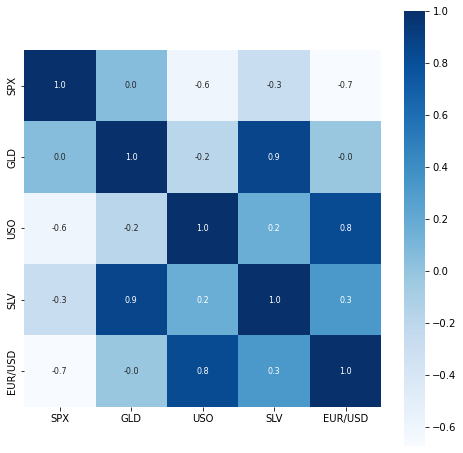

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

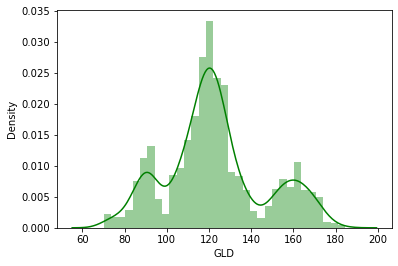

In [19]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

In [21]:
#Splitting the feature and target
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [22]:
#Splitting the training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [23]:
#Random forest regressor
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.58069978  81.98549975 115.91209997 127.61120053 120.67210133
 154.77099804 150.01809799 126.09010046 117.50829877 125.93430064
 116.65800118 171.8091009  141.32059941 167.36709851 115.30540048
 117.51770043 137.32120284 169.96570073 159.09950308 161.01480015
 155.11500037 125.35340022 175.69409922 157.75480363 125.18740034
  93.83269982  77.82049973 120.68420006 119.12099944 167.46940031
  88.14560081 125.30829997  91.2420006  117.5760005  121.14039885
 135.90670064 115.53690144 115.08610065 148.66949968 107.33810122
 104.21080234  87.15239798 126.45260009 117.87239966 151.87909912
 119.88149993 108.31360022 108.09439839  92.94130007 127.10009818
  75.14340009 113.64949934 121.29150021 111.17909919 118.96809882
 120.84129968 159.75660043 167.98810044 146.97229687  85.71099816
  94.26720045  86.78869917  90.53950037 119.11170079 126.30700052
 127.31769987 169.56980035 122.31479937 117.30939862  98.60590041
 168.50610082 143.17459781 131.91540176 121.15150239 121.15329911
 119.93450

In [27]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9895380892942431


In [28]:
#Lets plot actual and predicted value
Y_test = list(Y_test)

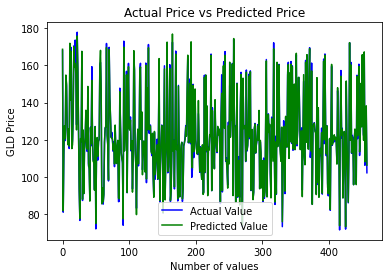

In [29]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()